<a href="https://www.kaggle.com/code/ashadullah/cats-v-dogs-classification?scriptVersionId=165536704" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.375.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.704.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.8597.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5740.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5703.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7717.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2618.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.1956.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5608.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5646.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7267.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5341.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7792.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2888.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.3808.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.838

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

2024-03-05 10:50:21.784887: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 10:50:21.784998: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 10:50:21.925378: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int', # Cats and dogs will get their own integer labels
    batch_size=32,
    image_size=(256,256)
)
# /kaggle/input/dogs-vs-cats/test
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int', # Cats and dogs will get their own integer labels
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# ways to reduce overfitting

## Add more data
## Data Augmentation -> next video
## L1/L2 Regularizer
## Dropout
## Batch Norm
## Reduce complexity

In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


2024-03-05 10:50:52.282394: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 5.22285, expected 4.50617
2024-03-05 10:50:52.282470: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19: 4.83523, expected 4.11855
2024-03-05 10:50:52.282480: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 20: 6.14347, expected 5.42679
2024-03-05 10:50:52.282488: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21: 5.72417, expected 5.00749
2024-03-05 10:50:52.282497: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 6.00776, expected 5.29109
2024-03-05 10:50:52.282505: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 5.39609, expected 4.67941
2024-03-05 10:50:52.282513: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 5.14673, expected 4.43005
2024-03-05 10:50:52.282521: E external/local_xla/

  3/625 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.4705 - loss: 3.8775   

I0000 00:00:1709635861.292646      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5615 - loss: 2.5001

2024-03-05 10:52:05.675034: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129032: 6.56968, expected 5.72998
2024-03-05 10:52:05.675103: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129051: 7.10358, expected 6.26388
2024-03-05 10:52:05.675120: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129052: 6.99086, expected 6.15116
2024-03-05 10:52:05.675135: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129062: 7.37213, expected 6.53244
2024-03-05 10:52:05.675151: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129063: 6.0521, expected 5.2124
2024-03-05 10:52:05.675163: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129064: 7.1427, expected 6.30301
2024-03-05 10:52:05.675175: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129072: 7.38607, expected 6.54637
2024-03-05 10:52:05.675

625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.5615 - loss: 2.4984 - val_accuracy: 0.6624 - val_loss: 0.7701
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.6768 - loss: 0.6035 - val_accuracy: 0.7248 - val_loss: 0.5780
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.7346 - loss: 0.5282 - val_accuracy: 0.7570 - val_loss: 0.5146
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.7640 - loss: 0.4820 - val_accuracy: 0.7524 - val_loss: 0.5765
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.7990 - loss: 0.4387 - val_accuracy: 0.7798 - val_loss: 0.4923
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.8206 - loss: 0.3900 - val_accuracy: 0.7510 - val_loss: 0.6341
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8507 - loss: 0.3323 - val_accuracy: 0.7618 - val_loss: 0.5543
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8796 - loss: 0.2791 - val_accura

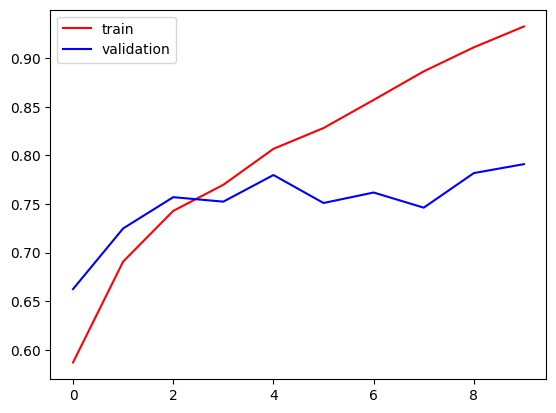

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

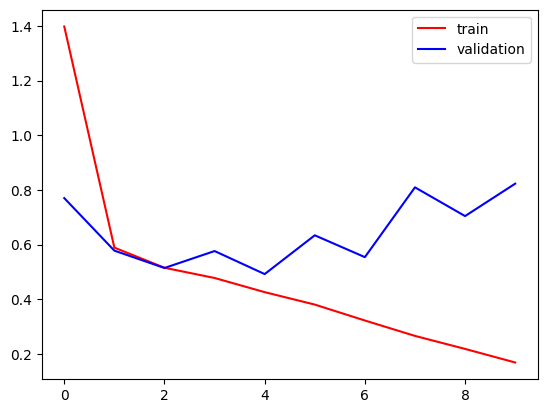

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
import cv2

In [12]:
test_img = cv2.imread('/kaggle/input/dogs-vs-cats/train/cats/cat.1043.jpg')

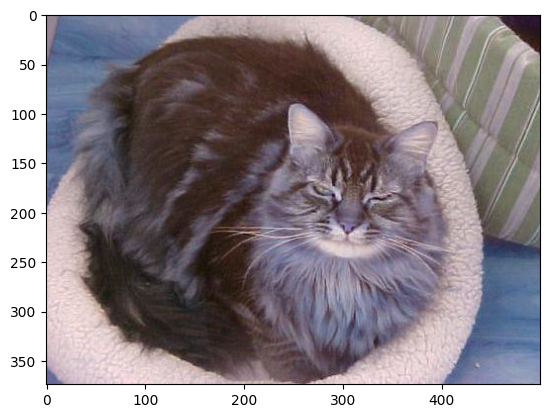

In [13]:
plt.imshow(test_img)

In [14]:
test_img.shape

(374, 500, 3)

In [15]:
test_img = cv2.resize(test_img,(256,256))

In [16]:
test_input = test_img.reshape((1,256,256,3))

In [17]:
model.predict(test_input)

2024-03-05 10:57:07.154426: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387127: 5.77154, expected 5.03187
2024-03-05 10:57:07.154509: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387168: 6.05753, expected 5.31786
2024-03-05 10:57:07.154520: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387274: 5.79451, expected 5.05483
2024-03-05 10:57:07.154528: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387303: 6.3865, expected 5.64683
2024-03-05 10:57:07.154537: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387310: 6.3852, expected 5.64553
2024-03-05 10:57:07.154545: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387370: 6.37416, expected 5.63449
2024-03-05 10:57:07.154554: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387381: 4.72788, expected 3.98821
2024-03-05 10:57:07.15

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


array([[1.]], dtype=float32)

In [18]:
# now for dog it should returns array[1]
test_img = cv2.imread('/kaggle/input/dogs-vs-cats/train/dogs/dog.6813.jpg')

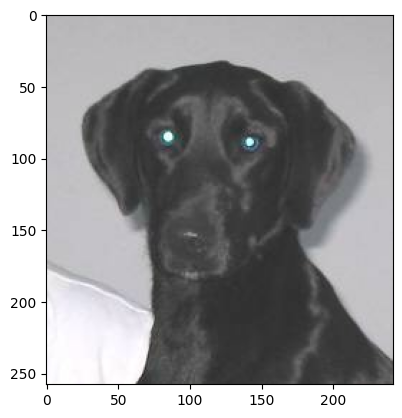

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(258, 242, 3)

In [21]:
test_img = cv2.resize(test_img,(256,256))

In [22]:
test_input = test_img.reshape((1,256,256,3))

In [23]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[1.]], dtype=float32)